In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Constants
DT = 0.01  # Time step
G = 9.81  # Gravity
MASS = 1.0  # Mass of quadcopter
INERTIA = 1.0  # Inertia of quadcopter
L = 1.0  # Length of pendulum
KF = 0.1  # Low-pass filter constant
KP = 1.0  # Proportional gain
KI = 1.0  # Integral gain
KD = 1.0  # Derivative gain

In [7]:
# Initial conditions
x = np.array([0.0, 0.0])  # State (angle, angular velocity)
u = 0.0  # Control input (force)


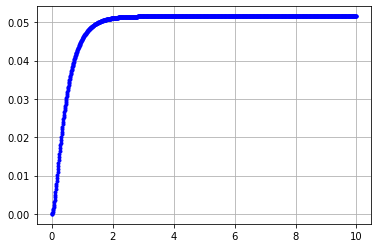

In [8]:
# Simulation loop
for t in np.arange(0.0, 10.0, DT):
    # Read sensor data
    y = x[0]  # Position of pendulum

    # Calculate error
    error = 0.0 - y

    # Calculate control signal
    u_ff = G * MASS / L  # Feedforward term
    u_p = KP * error  # Proportional term
    u_i = KI * error * DT  # Integral term
    u_d = KD * (error - x[1]) / DT  # Derivative term
    u = u_ff + u_p + u_i + u_d  # Total control signal

    # Low-pass filter
    u = u * KF + u * DT  # Apply filter

    # Update state
    x_dot = np.array([x[1], -G * np.sin(x[0]) / L + u / (MASS * L**2)])
    x = x + x_dot * DT

    # Plot results
    
    plt.plot(t, x[0], 'b.')
    
plt.grid()
plt.show()